In [64]:
# Install some packages
!pip install nltk
!pip install beautifulsoup4

In [65]:
import nltk

In [66]:
# Download the NLTK extra data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/luanpham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luanpham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/luanpham/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luanpham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/luanpham/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [67]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

### Load the data

In [69]:
df = pd.DataFrame(columns=['content', 'class'])

In [70]:
from bs4 import UnicodeDammit

In [71]:
path = 'Data/bbc/'
for directory in os.listdir(path):
    directory = os.path.join(path, directory)
    if os.path.isdir(directory):
        for filename in os.listdir(directory):
            filename = os.path.join(directory, filename)
            encoding = ''
            with open(filename, 'rb') as f:
                content = f.read()
                suggestion = UnicodeDammit(content)
                encoding = suggestion.original_encoding

            with open(filename, encoding=encoding) as f:
                content = f.read()
                current_df = pd.DataFrame({'content': [content], 'class': [os.path.basename(directory)]})
                df = df.append(current_df, ignore_index=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2225 non-null   object
 1   class    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [73]:
# Check null
df.isnull().sum()

content    0
class      0
dtype: int64

In [74]:
# Check duplicates
df.duplicated().sum()

98

In [75]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [76]:
# Check duplicates again
df.duplicated().sum()

0

In [77]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [78]:
# Check the first 5 rows
df.head()

content          class
0  Musicians to tackle US red tape\n\nMusicians' ...  entertainment
1  U2's desire to be number one\n\nU2, who have w...  entertainment
2  Rocker Doherty in on-stage fight\n\nRock singe...  entertainment
3  Snicket tops US box office chart\n\nThe film a...  entertainment
4  Ocean's Twelve raids box office\n\nOcean's Twe...  entertainment

In [79]:
# Check the last 5 rows
df.tail()

content class
2122  Warning over Windows Word files\n\nWriting a M...  tech
2123  Fast lifts rise into record books\n\nTwo high-...  tech
2124  Nintendo adds media playing to DS\n\nNintendo ...  tech
2125  Fast moving phone viruses appear\n\nSecurity f...  tech
2126  Hacker threat to Apple's iTunes\n\nUsers of Ap...  tech

### Clean the text

In [80]:
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [81]:
# Create a cluster
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

2022-11-05 09:02:13,389 - distributed.worker - WARNING - Mismatched versions found

+---------+---------------------------------------------+-----------+---------+
| Package | Worker-28d96c67-28b1-4f2d-92e6-22f6329c8e39 | Scheduler | Workers |
+---------+---------------------------------------------+-----------+---------+
| tornado | 6.1                                         | 6.2       | 6.1     |
+---------+---------------------------------------------+-----------+---------+
2022-11-05 09:02:13,390 - distributed.worker - WARNING - Mismatched versions found

+---------+---------------------------------------------+-----------+---------+
| Package | Worker-c5c81849-70b1-4323-b00d-1f1ad33d487c | Scheduler | Workers |
+---------+---------------------------------------------+-----------+---------+
| tornado | 6.1                                         | 6.2       | 6.1     |
+---------+---------------------------------------------+-----------+---------+
2022-11-05 09:02:13,391 - distri

In [82]:
from myhelpers import text_cleaner

In [83]:
# Create a dask dataframe from the pandas dataframe
ddf = dd.from_pandas(df, npartitions=16)
ddf = ddf.map_partitions(text_cleaner.simple_text_clean)

In [84]:
# Convert the dask dataframe to pandas dataframe
print('Converting dask dataframe to pandas dataframe...')
with ProgressBar():
    df = ddf.compute(num_workers=8)

# Free up memory
del ddf

Converting dask dataframe to pandas dataframe...
[########################################] | 100% Completed | 7.28 ss


In [102]:
# Check the first 5 rows
df.head()

content          class
0  musician tackle u red tape musician group tack...  entertainment
1  desire number one three prestigious grammy awa...  entertainment
2  rocker doherty stage fight rock singer pete do...  entertainment
3  snicket top u box office chart film adaptation...  entertainment
4  ocean twelve raid box office ocean twelve crim...  entertainment

### Count vectorizer

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

In [87]:
# Fit the CountVectorizer object to the data
count_vectorizer.fit(df['content'])

CountVectorizer()

In [88]:
# Transform the data
X = count_vectorizer.transform(df['content'])

In [89]:
y = df['class']

In [90]:
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

In [91]:
# Print the first 5 rows
df_new.head()

aa  aaa  aaas  aac  aadc  aaliyah  aaltra  aamir  aan  aara  ...  zoom  \
0   0    0     0    0     0        0       0      0    0     0  ...     0   
1   0    0     0    0     0        0       0      0    0     0  ...     0   
2   0    0     0    0     0        0       0      0    0     0  ...     0   
3   0    0     0    0     0        0       0      0    0     0  ...     0   
4   0    0     0    0     0        0       0      0    0     0  ...     0   

   zooropa  zornotza  zorro  zubair  zuluaga  zurich  zutons  zvonareva  \
0        0         0      0       0        0       0       0          0   
1        1         0      0       0        0       0       0          0   
2        0         0      0       0        0       0       0          0   
3        0         0      0       0        0       0       0          0   
4        0         0      0       0        0       0       0          0   

   zvyagintsev  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 23076 columns]

### Use Naive Bayes to classify the data

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [93]:
# Create a MultinomialNB object
nb_classifier = MultinomialNB()

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Fit the MultinomialNB object to the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [96]:
# Predict the test data
y_pred = nb_classifier.predict(X_test)

In [97]:
# Accuracy score
print('Training accuracy: ', nb_classifier.score(X_train, y_train))
print('Testing accuracy: ', nb_classifier.score(X_test, y_test))

Training accuracy:  0.9941211052322163
Testing accuracy:  0.9647887323943662


In [98]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [99]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,   0,   4,   0,   4],
       [  1,  70,   2,   0,   1],
       [  0,   1,  79,   0,   0],
       [  0,   0,   0,  91,   0],
       [  1,   1,   0,   0,  71]])

In [100]:
# Plot the confusion matrix
import seaborn as sns

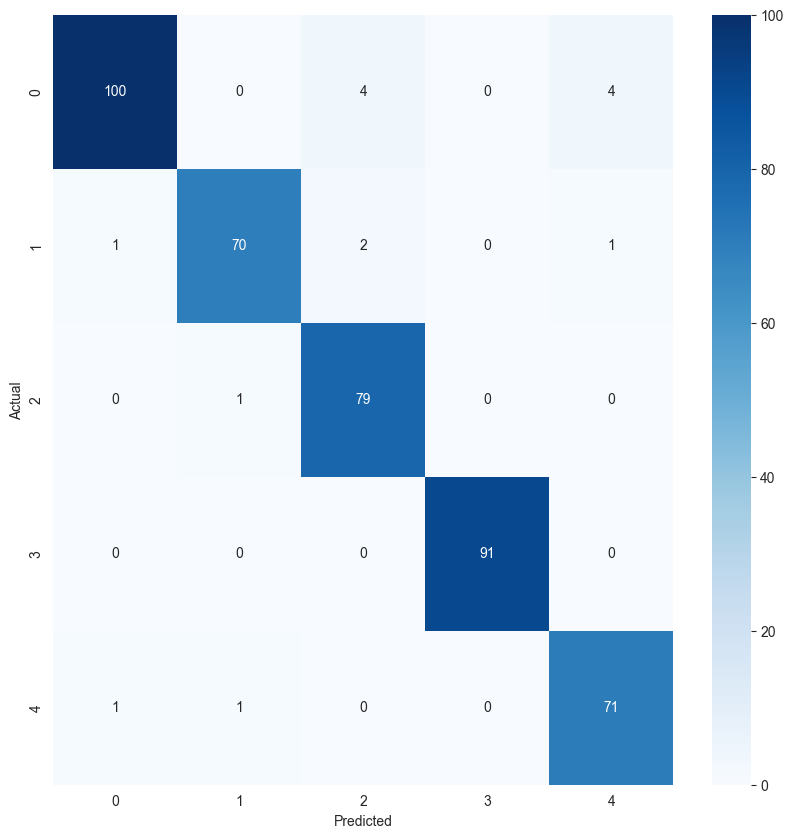

In [101]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Use TF_IDF to extract more features from the data

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [108]:
# Fit the TfidfVectorizer object to the data
tfidf_vectorizer.fit(df['content'])

TfidfVectorizer(min_df=0.02, ngram_range=(1, 2))

In [109]:
# Transform the data
X = tfidf_vectorizer.transform(df['content'])

In [110]:
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [111]:
# Print the first 5 rows
df_new.head()

ability  able  absolutely  abuse   academy  accept  access    accord  \
0  0.083792   0.0         0.0    0.0  0.000000     0.0     0.0  0.000000   
1  0.044874   0.0         0.0    0.0  0.000000     0.0     0.0  0.031627   
2  0.000000   0.0         0.0    0.0  0.090105     0.0     0.0  0.000000   
3  0.000000   0.0         0.0    0.0  0.000000     0.0     0.0  0.000000   
4  0.000000   0.0         0.0    0.0  0.000000     0.0     0.0  0.067385   

   account  accuse  ...  write  writer  wrong      year  year ago  year old  \
0      0.0     0.0  ...    0.0     0.0    0.0  0.028630       0.0       0.0   
1      0.0     0.0  ...    0.0     0.0    0.0  0.045998       0.0       0.0   
2      0.0     0.0  ...    0.0     0.0    0.0  0.000000       0.0       0.0   
3      0.0     0.0  ...    0.0     0.0    0.0  0.000000       0.0       0.0   
4      0.0     0.0  ...    0.0     0.0    0.0  0.000000       0.0       0.0   

   year say  yet      york  young  
0       0.0  0.0  0.000000    0.0  
1       0.0  0.0  0.000000    0.0  
2       0.0  0.0  0.000000    0.0  
3       0.0  0.0  0.000000    0.0  
4       0.0  0.0  0.089049    0.0  

[5 rows x 1510 columns]

### Use Gaussian Mixture Model for clustering

In [112]:
from sklearn.mixture import GaussianMixture

In [113]:
MIN_K = 2
MAX_K = 9
K = range(MIN_K, MAX_K + 1)

In [117]:
# Use multiprocess to speed up the clustering
import multiprocess as mp
from itertools import repeat
from datetime import datetime

In [118]:
def gmm_test(dataframe, k):
    from sklearn.mixture import GaussianMixture
    from sklearn import metrics
    from sklearn.metrics import silhouette_score

    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(dataframe)

    return (silhouette_score(dataframe, gmm.predict(dataframe)), gmm)

In [119]:
start_time = datetime.now()
### pôol tạo riêng cho tưng model
a_pool = mp.Pool(processes=(MAX_K - MIN_K + 1))
results = a_pool.starmap(gmm_test, zip(repeat(df_new), K))
end_time = datetime.now()
print('Time taken: ', end_time - start_time)

Time taken:  0:06:05.703171


In [120]:
from myhelpers import silhouette_plot

In [121]:
gmm_clustering_silhouettes = {}
gmm_clustering_models = {}
i = MIN_K
for ret in results:
    gmm_clustering_silhouettes[i] = ret[0]
    gmm_clustering_models[i] = ret[1]
    i = i + 1

Text(0, 0.5, 'Silhouette score')

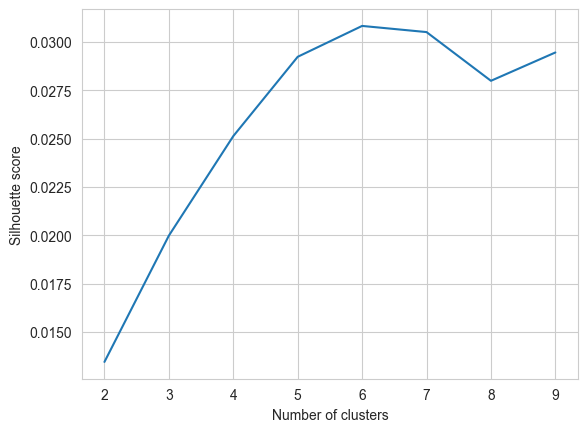

In [122]:
# Plot the silhouette graph
plt.plot(K, gmm_clustering_silhouettes.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.013445431160740264
For n_clusters = 3 The average silhouette_score is : 0.019979622224925872
For n_clusters = 4 The average silhouette_score is : 0.02512815921976
For n_clusters = 5 The average silhouette_score is : 0.029232773977349934
For n_clusters = 6 The average silhouette_score is : 0.030830400042052102
For n_clusters = 7 The average silhouette_score is : 0.030511771319354432
For n_clusters = 8 The average silhouette_score is : 0.027990930142667677
For n_clusters = 9 The average silhouette_score is : 0.02945613602294363


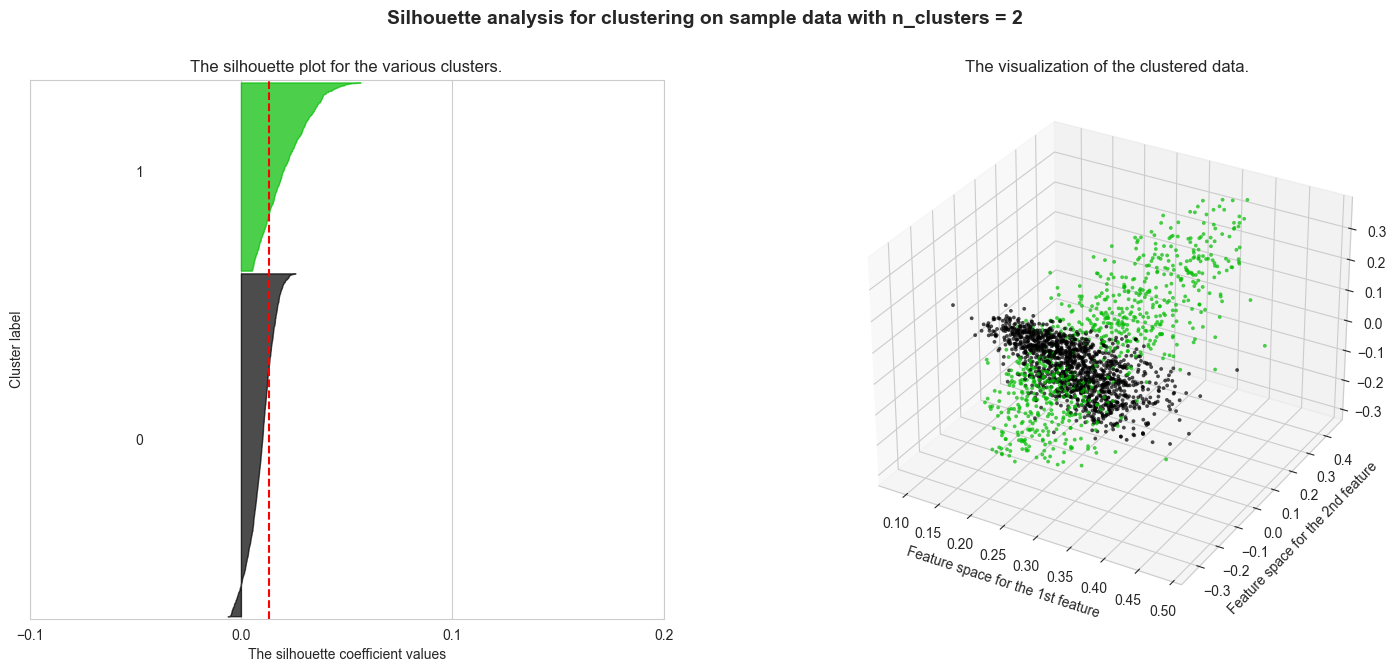

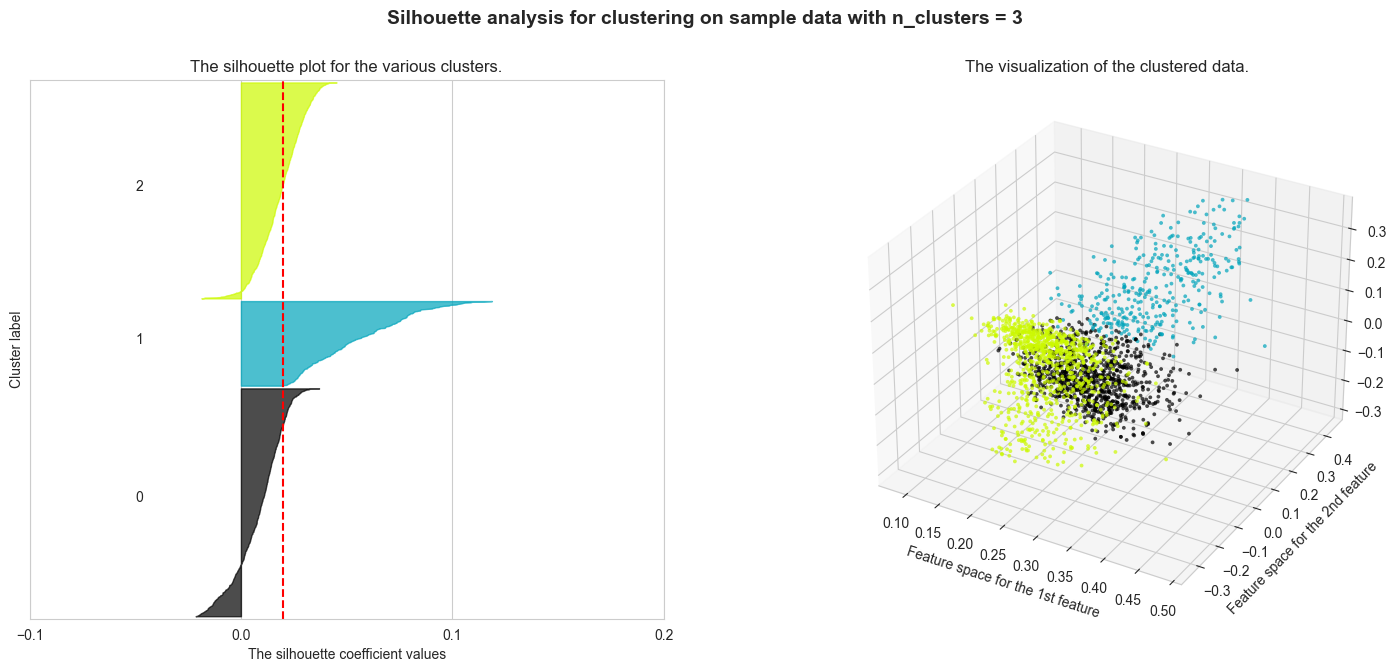

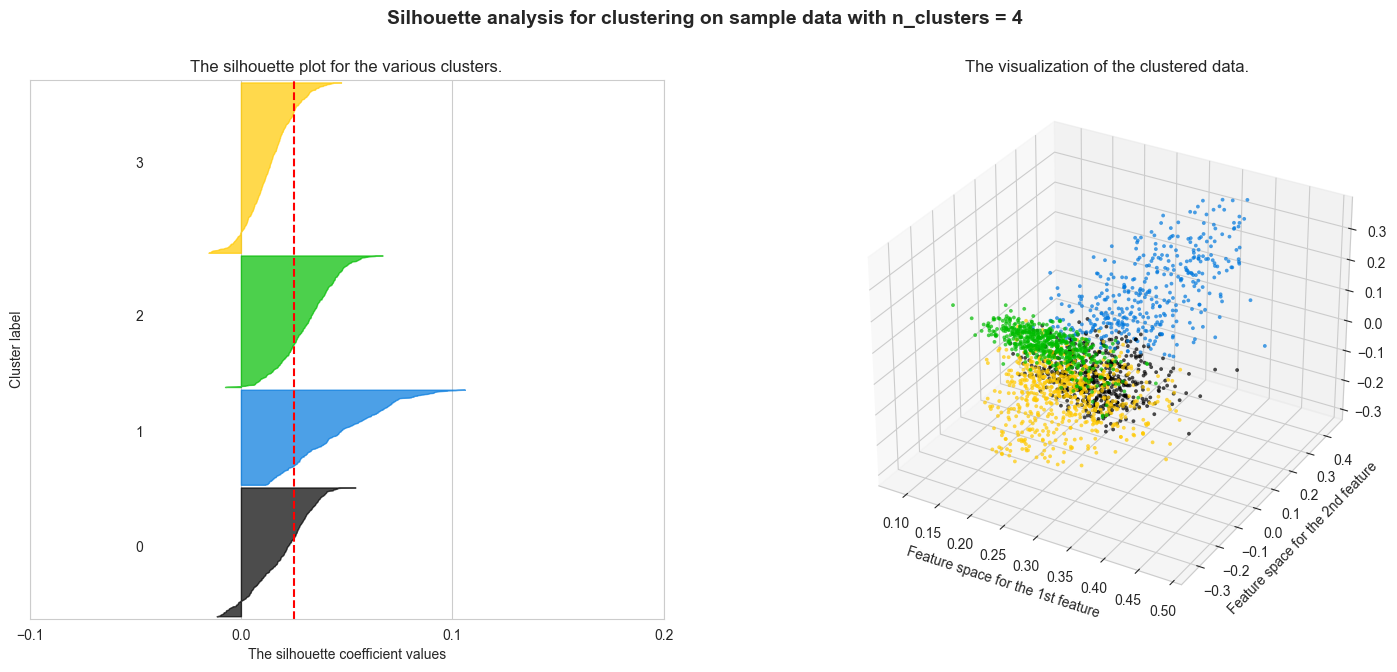

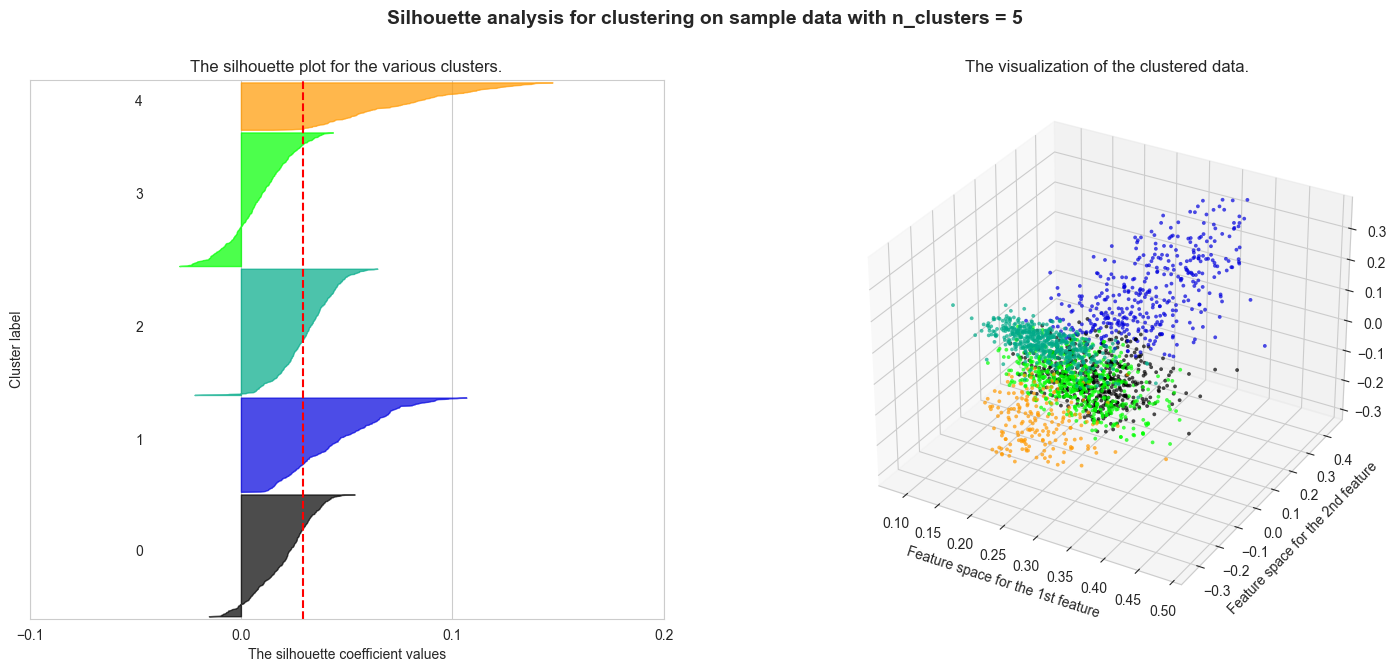

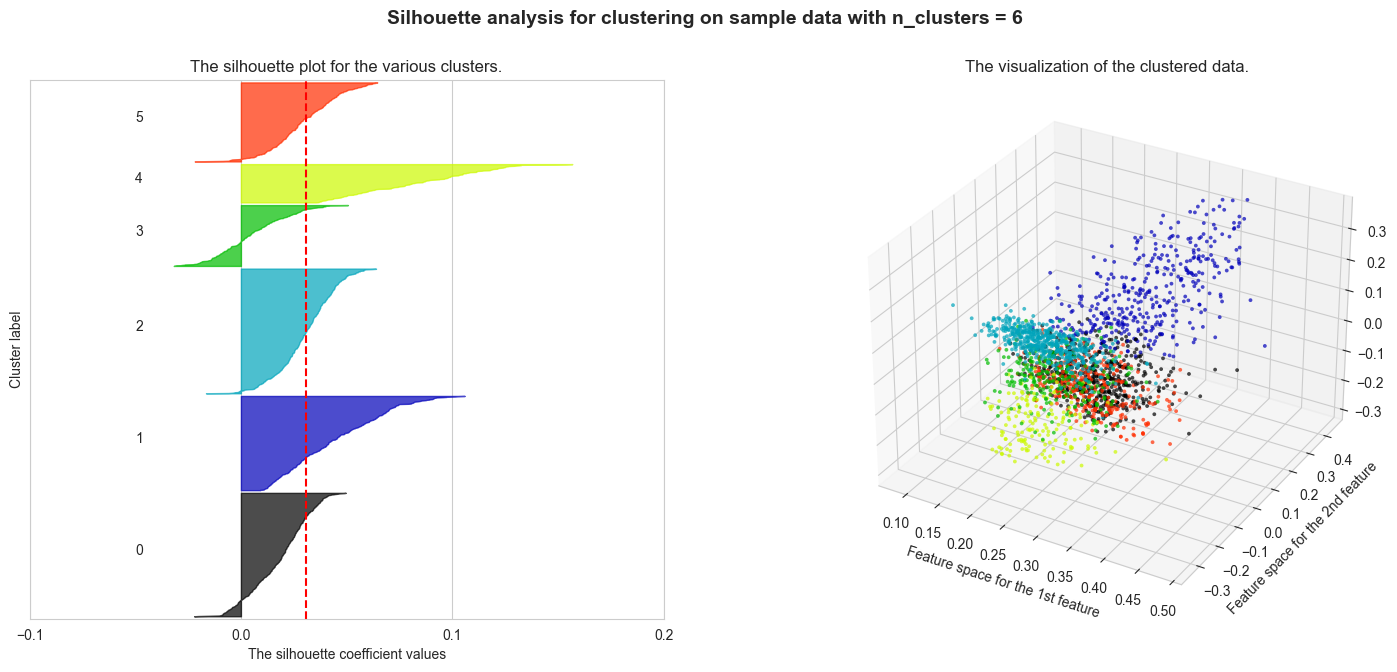

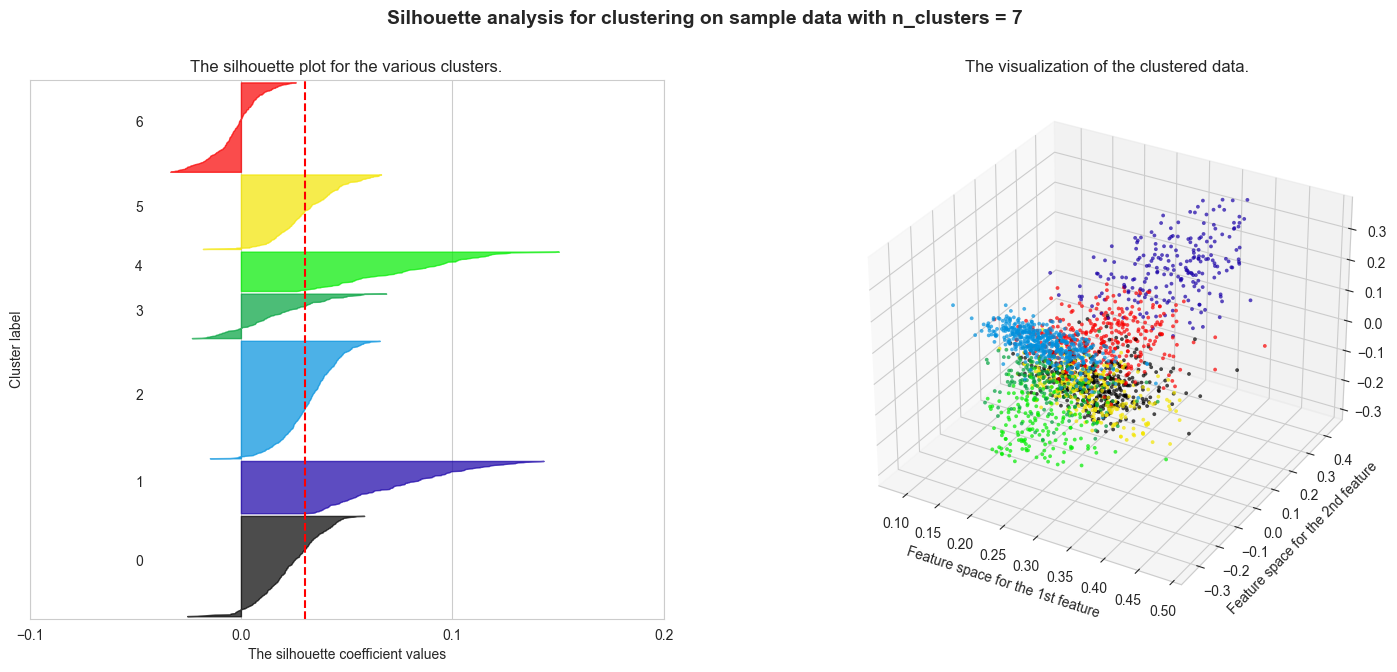

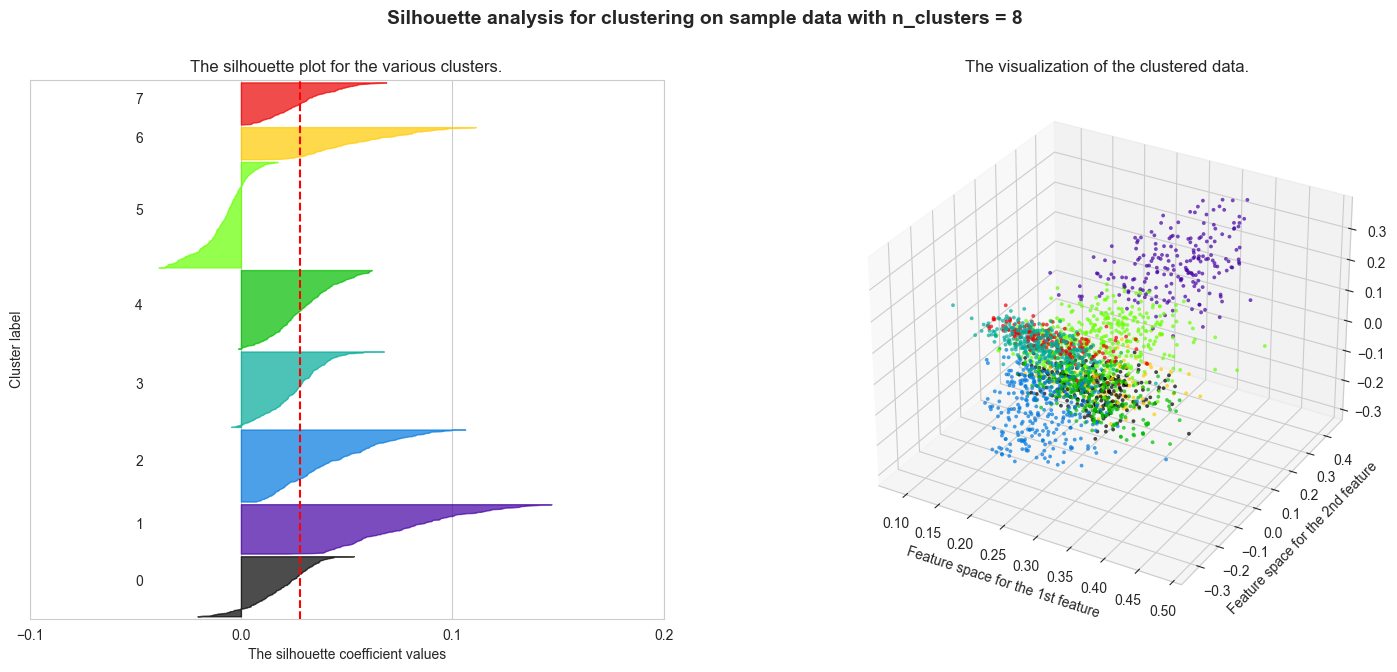

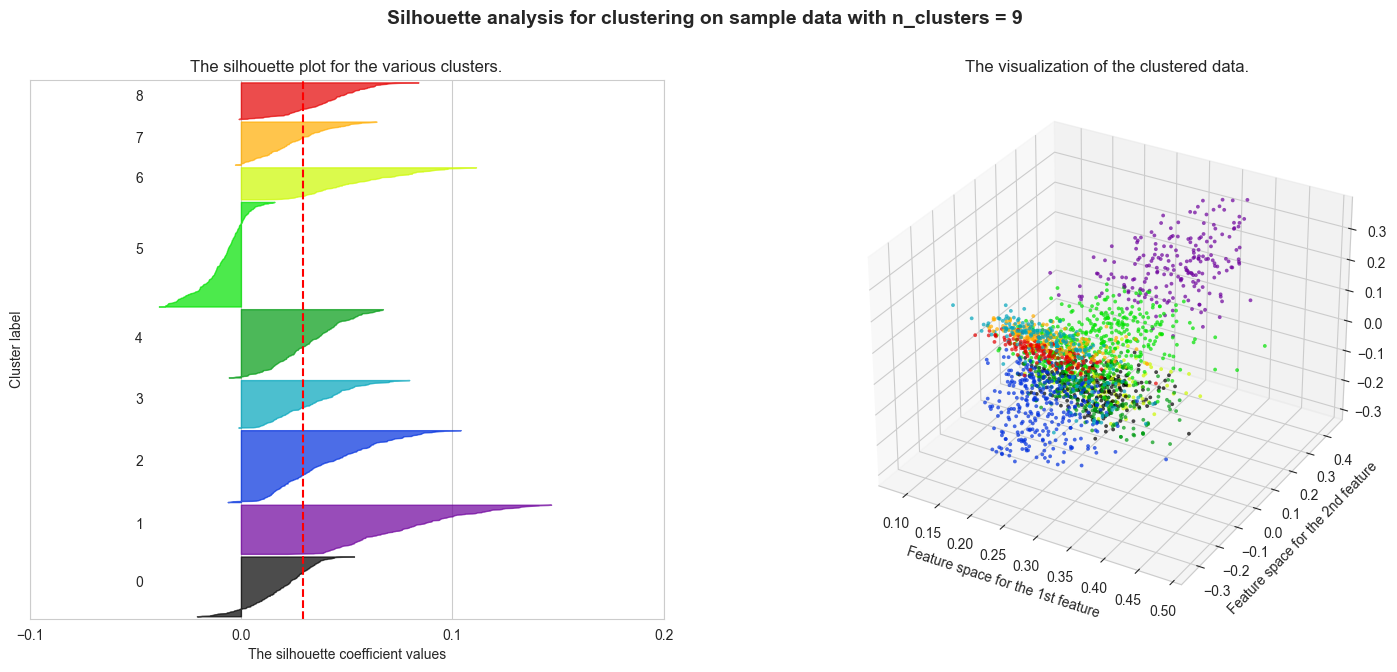

In [123]:
silhouette_plot.silhouette_plot(MAX_K, df_new, gmm_clustering_models, gmm_clustering_silhouettes)

### Use K-Means for clustering

In [124]:
from sklearn.cluster import KMeans

In [125]:
def kmean_test(df, k):
    from sklearn.cluster import KMeans
    from sklearn import metrics
    from scipy.spatial.distance import cdist
    import numpy as np

    kmeanModel = KMeans(n_clusters=k, n_init=20, max_iter=1000, random_state=42)
    kmeanModel.fit(df)

    return (kmeanModel.inertia_,
            metrics.silhouette_score(df, kmeanModel.labels_, metric='euclidean'),
            kmeanModel)

In [126]:
start_time = datetime.now()
a_pool = mp.Pool(processes=(MAX_K - MIN_K + 1))
results = a_pool.starmap(kmean_test, zip(repeat(df_new), K))
end_time = datetime.now()
print('Time taken: ', end_time - start_time)

Time taken:  0:01:24.591131


In [127]:
kmeans_distortions = []
kmeans_silhouettes = {}
kmean_models = {}
for ret in results:
    kmeans_distortions.append(ret[0])
    kmeans_silhouettes[ret[2].n_clusters] = ret[1]
    kmean_models[ret[2].n_clusters] = ret[2]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

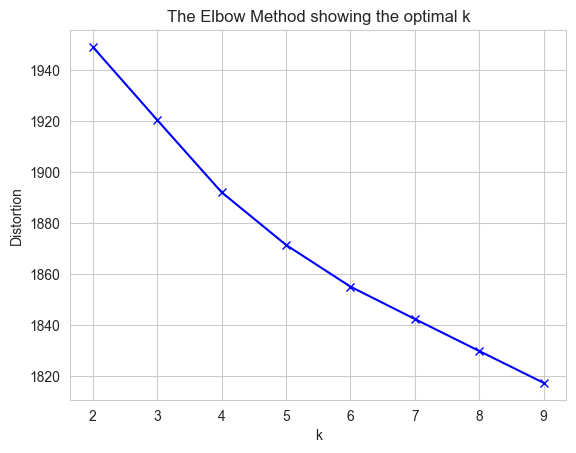

In [128]:
# Plot the elbow curve
plt.plot(K, kmeans_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

Text(0, 0.5, 'Silhouette score')

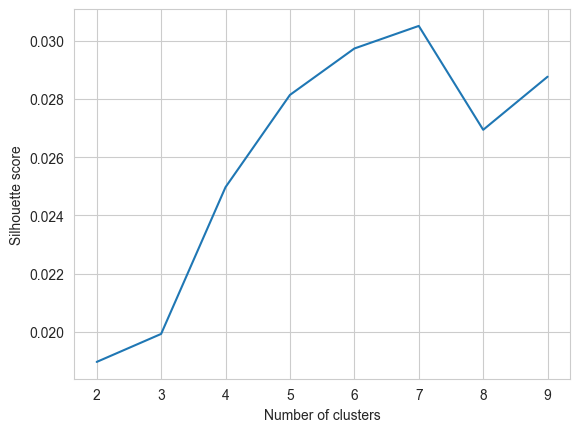

In [129]:
# Plot the silhouette graph
plt.plot(K, kmeans_silhouettes.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.01896154631387569
For n_clusters = 3 The average silhouette_score is : 0.019923755960069126
For n_clusters = 4 The average silhouette_score is : 0.02496942916587422
For n_clusters = 5 The average silhouette_score is : 0.028139771142539766
For n_clusters = 6 The average silhouette_score is : 0.02973561395529809
For n_clusters = 7 The average silhouette_score is : 0.030511771319354432
For n_clusters = 8 The average silhouette_score is : 0.026940666115594914
For n_clusters = 9 The average silhouette_score is : 0.028766751661795365


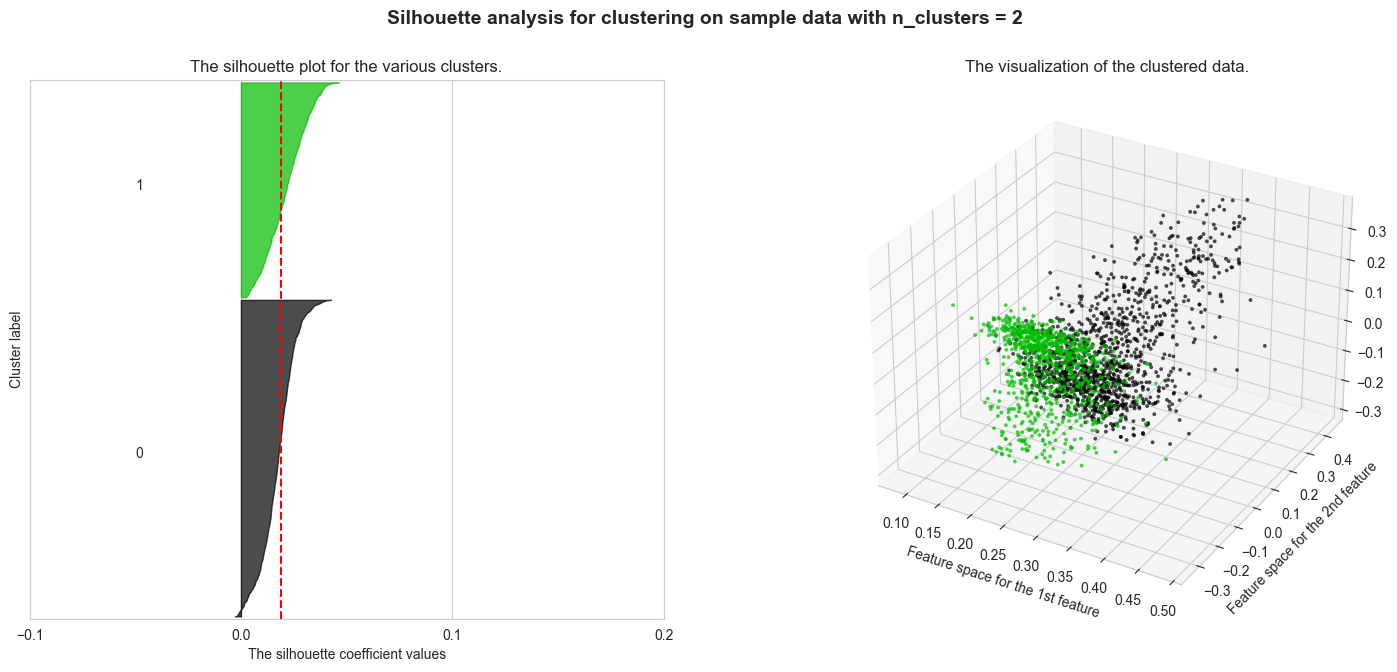

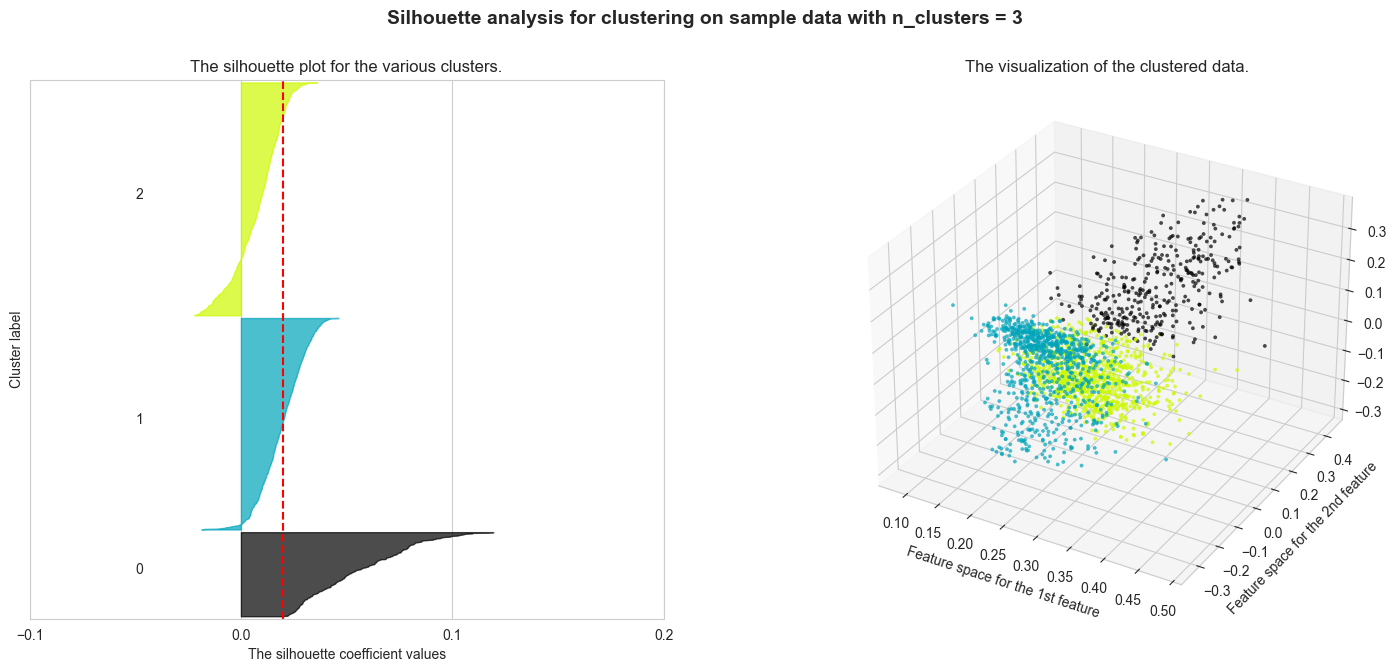

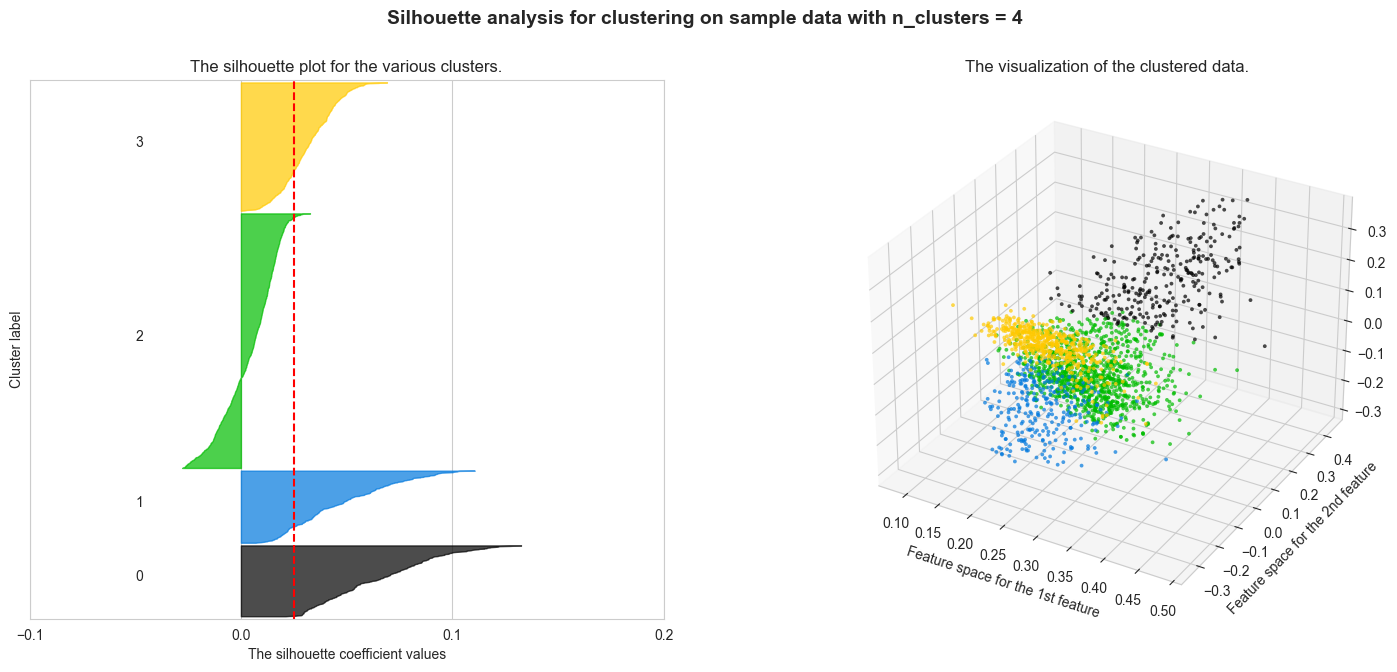

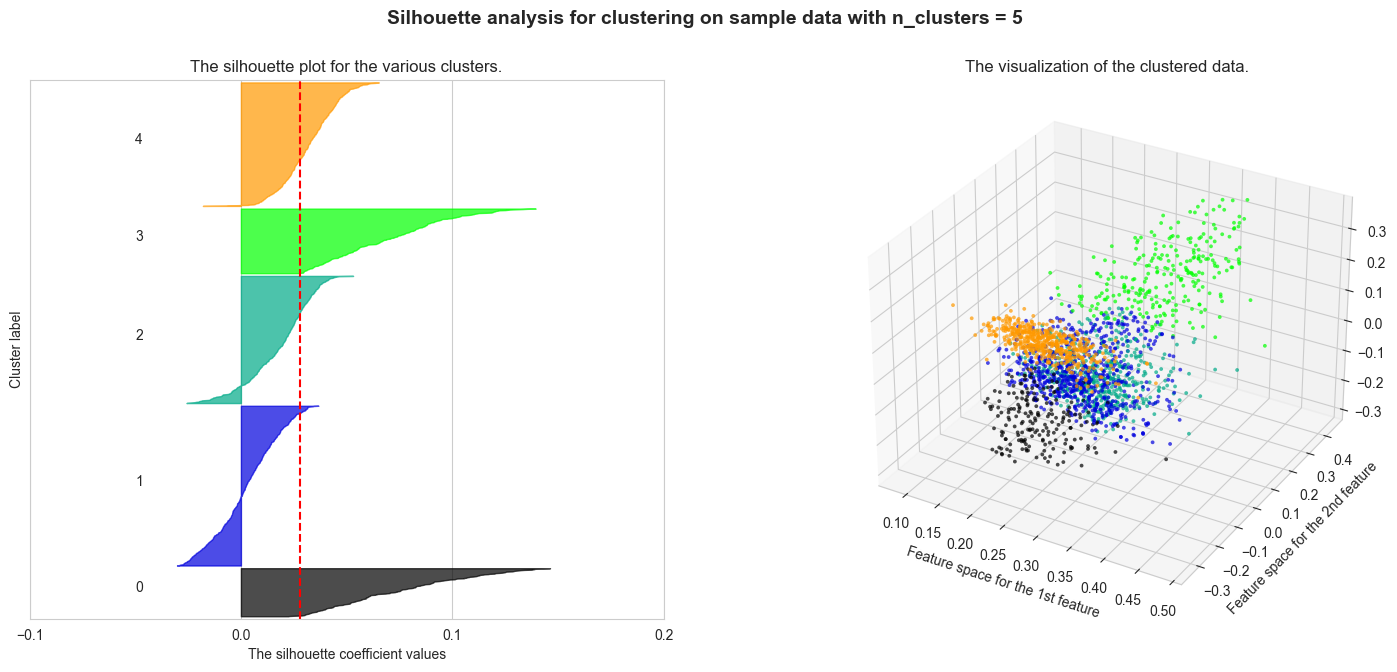

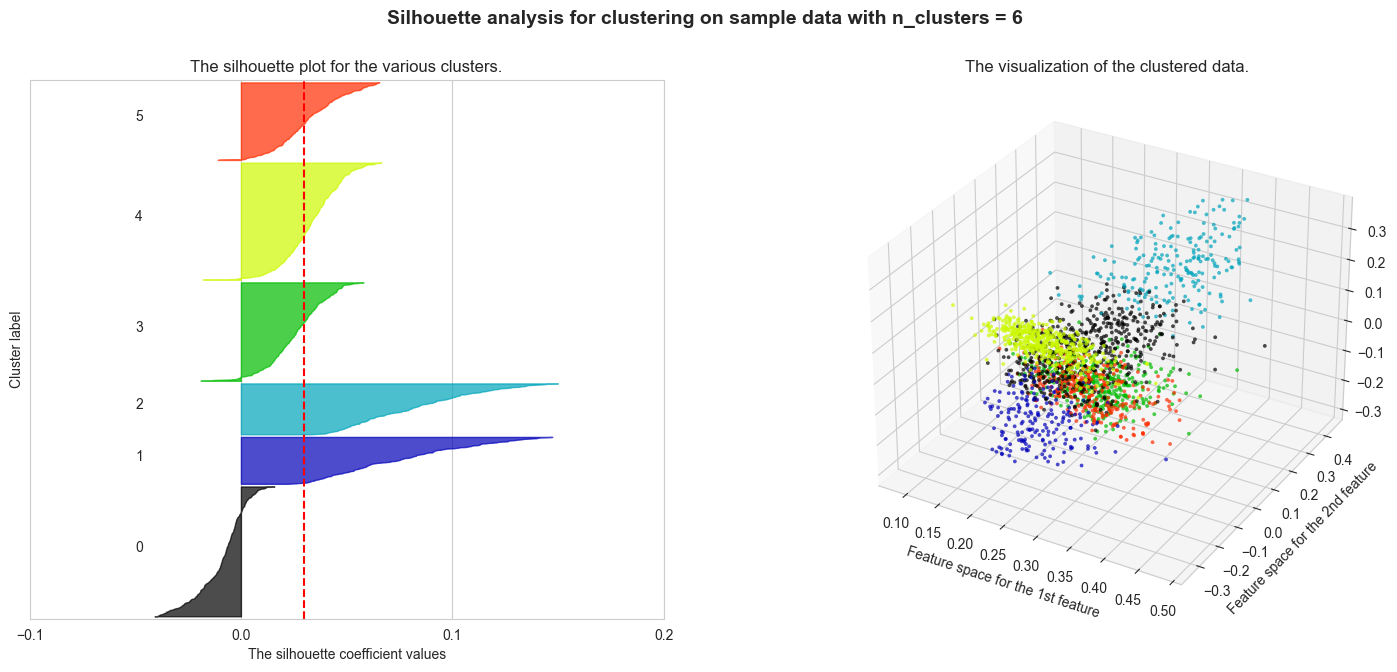

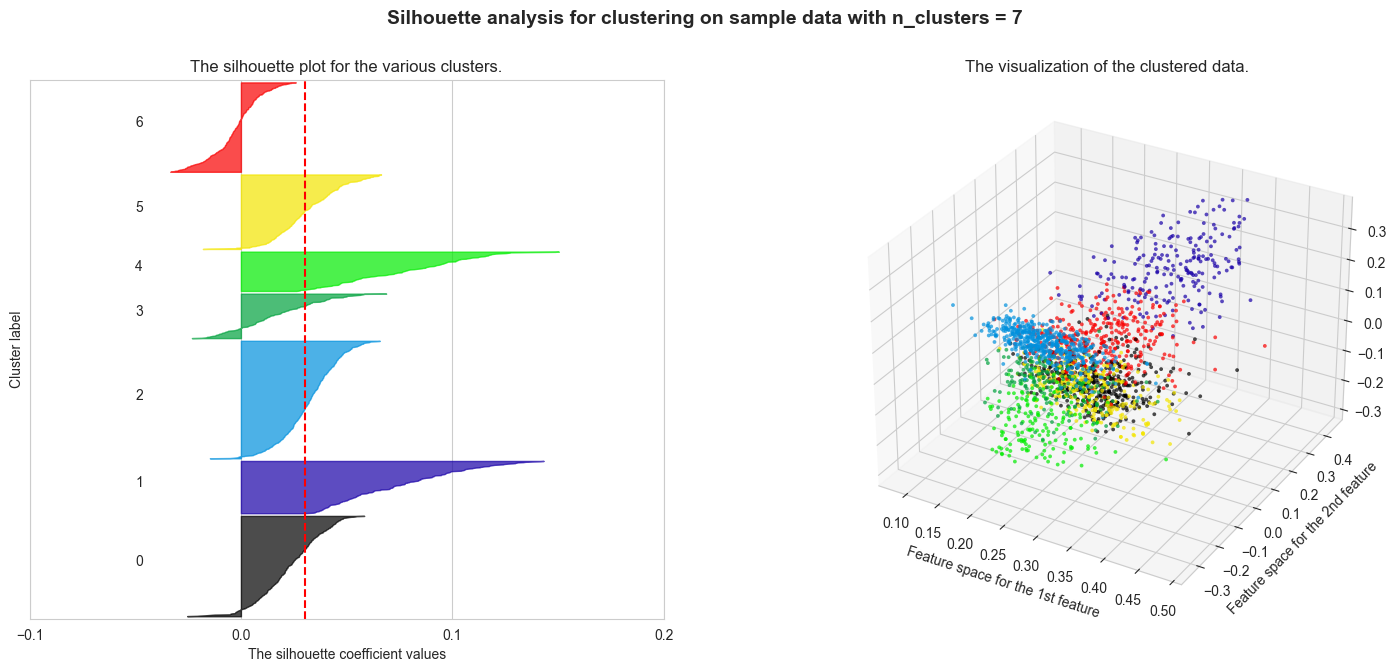

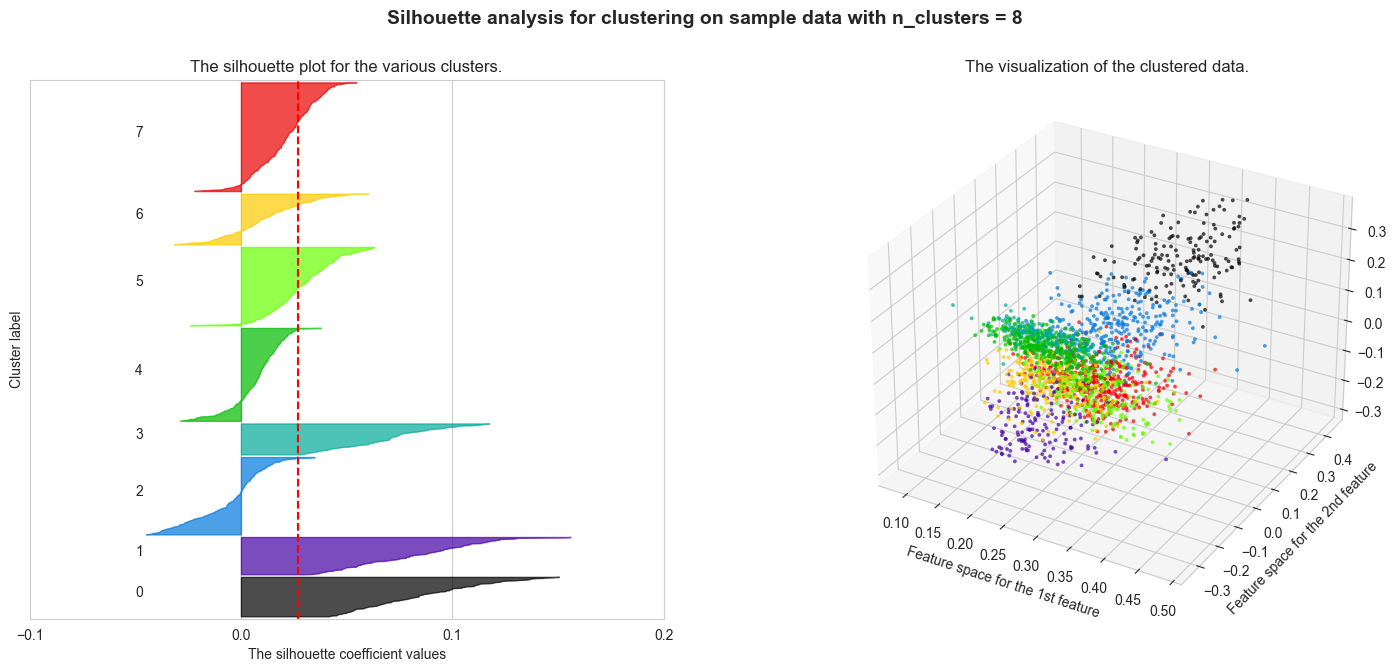

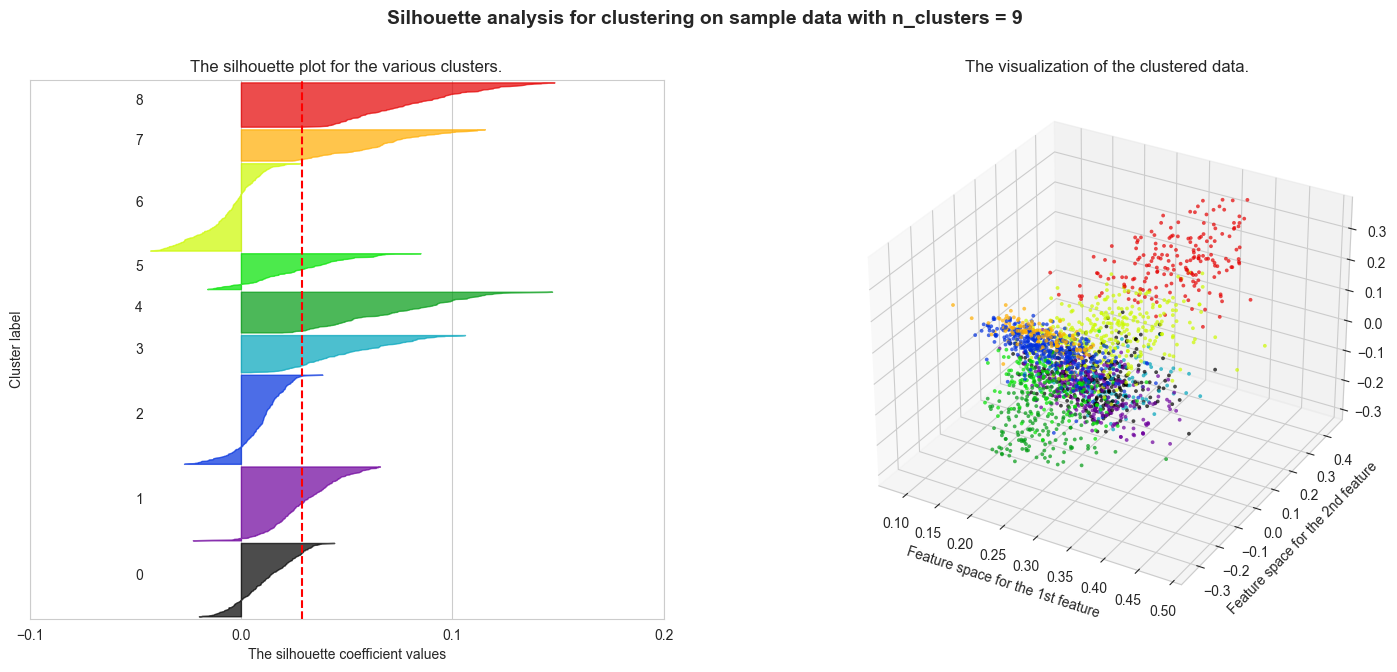

In [130]:
silhouette_plot.silhouette_plot(MAX_K, df_new, kmean_models, kmeans_silhouettes)

#### Nhận xét:
- Sử dụng GMM với số cụm k = 4.

In [131]:
# Create a new GMM object
gmm = GaussianMixture(n_components=4, random_state=42)

In [132]:
# Fit the GMM object to the data
gmm.fit(df_new)

GaussianMixture(n_components=4, random_state=42)

In [133]:
# Predict the clusters
y_pred = gmm.predict(df_new)

In [134]:
# Create a new column in the dataframe
df['cluster'] = y_pred

In [135]:
# Print the first 5 rows
df.head()

content          class  cluster
0  musician tackle u red tape musician group tack...  entertainment        3
1  desire number one three prestigious grammy awa...  entertainment        3
2  rocker doherty stage fight rock singer pete do...  entertainment        3
3  snicket top u box office chart film adaptation...  entertainment        3
4  ocean twelve raid box office ocean twelve crim...  entertainment        3

In [136]:
# Export the dataframe to an Excel file
df.to_excel('data.xlsx', index=False)

### Use wordcloud to visualize the data

In [138]:
from wordcloud import WordCloud

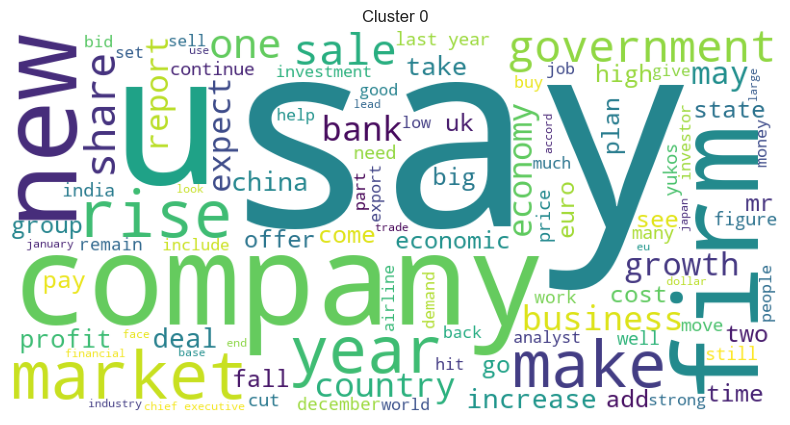

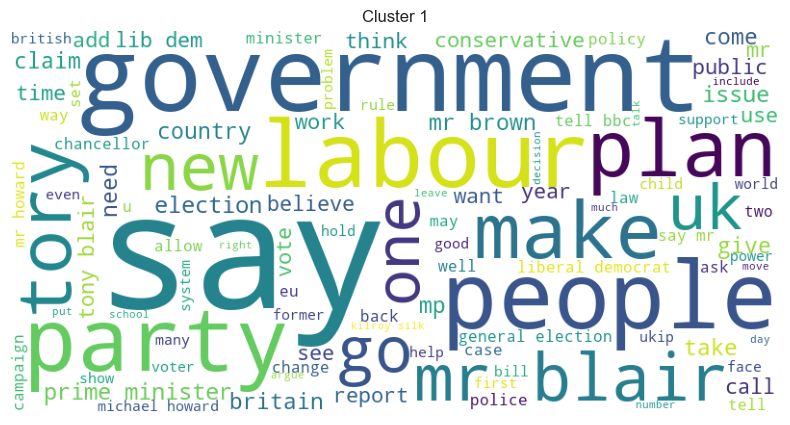

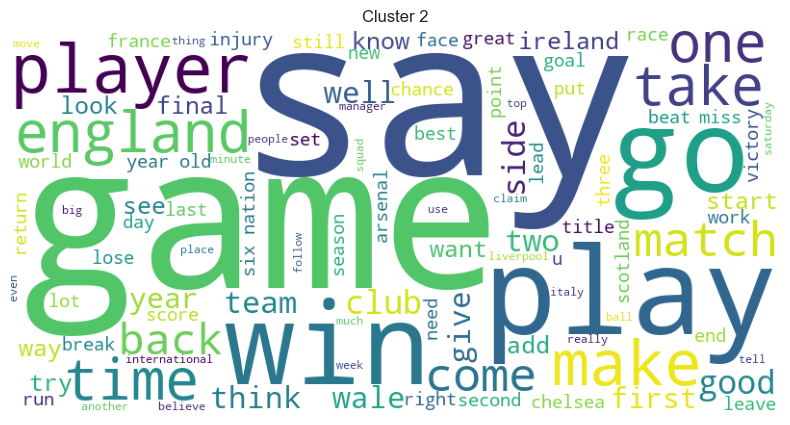

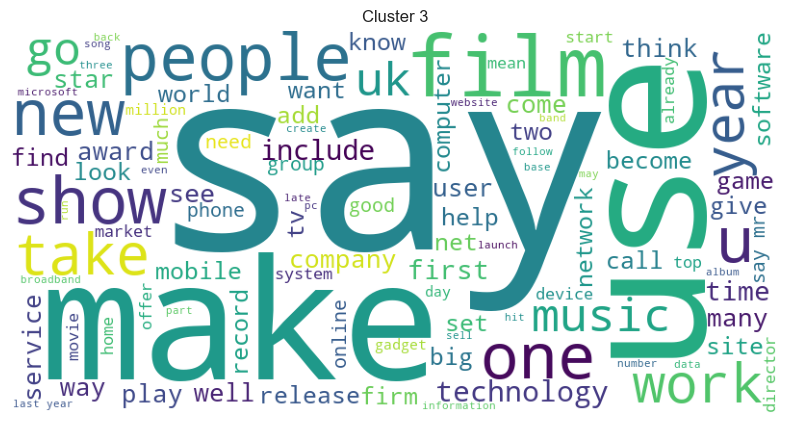

In [140]:
# For each cluster, create a wordcloud
for i in range(4):
    # Create a new dataframe for each cluster
    df_cluster = df[df['cluster'] == i]
    #%%
    # Join all the content in the dataframe
    content = ' '.join(df_cluster['content'])
    #%%
    # Create a wordcloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(content)
    #%%
    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title('Cluster ' + str(i))
    plt.axis('off')
    plt.show()